# Comparação entre os dias da semana

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
crime = {'mean': [10.232003783811226, 5.897220132917426, 5.760475797798771, 8.93281230349279, 10.467087670192328, 9.84131951671026, 9.641101206703926],
        'std': [0.17913285608865032, 0.24086068200681854, 0.07613866625335089, 0.14534397054407144, 0.08698359639466652, 0.09371577995901191, 0.16385400722879317]}

In [4]:
traffic = {'mean': [1.9511982650500463, 2.2427098583294445, 1.2834216623164538, 1.631922668018472, 2.17956421083677, 2.0287684311970287, 2.0962156755267083],
        'std': [0.05000741780494997, 0.048164322501155404, 0.04794279278880475, 0.052044126165314473, 0.06269206869846583, 0.04076389704536157, 0.0414537735271875]}

In [5]:
crashes = {'mean': [9.27446728812448, 14.969862638010179, 12.76892808215135, 15.230932146231066, 18.987951097095838, 13.845344854228586, 14.685023089682684],
        'std': [0.1082459765630334, 0.22688352085301397, 0.168657593238078, 0.13299724819500233, 0.12391127540295267, 0.13055316038848022, 0.17777085189751518]}

In [6]:
mcrime = crime['mean']
mtraffic = traffic['mean']
mcrashes = crashes['mean']

In [7]:
scrime = crime['std']
straffic = traffic['std']
scrashes = crashes['std']

In [8]:
def normalize(data):
    
    mini = min(data)
    maxi = max(data)
    
    return [(x - mini) / (maxi - mini) for x in data]

In [9]:
ncrime = normalize(crime['mean'])
ntraffic = normalize(traffic['mean'])
ncrashes = normalize(crashes['mean'])

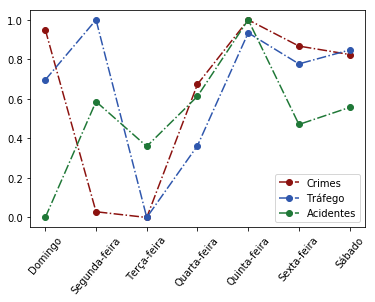

In [10]:
plt.clf()
ax = plt.subplot(111)

plt.plot(range(len(ncrime)), ncrime, 'o-.', color='#8c120f', label='Crimes')
plt.plot(range(len(ntraffic)), ntraffic, 'o-.', color='#2f57ad', label='Tráfego')
plt.plot(range(len(ncrashes)), ncrashes, 'o-.', color='#1f7837', label='Acidentes')

plt.xticks(range(7), ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'], rotation=50)

ax.legend()

plt.show()

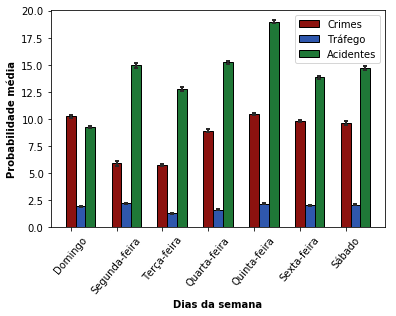

In [16]:
plt.clf()
ax = plt.subplot(111)

gap = 1.5 / len(ncrime)
plt.bar(range(len(mcrime)), mcrime, yerr=scrime, width=gap, label='Crimes', color='#8c120f', edgecolor='#000000', error_kw=dict(ecolor='#292828', lw=2, capsize=2, capthick=2))
plt.bar(np.arange(len(mtraffic)) + gap, mtraffic, yerr=straffic, width=gap, label='Tráfego', color='#2f57ad', edgecolor='#000000', error_kw=dict(ecolor='#292828', lw=2, capsize=2, capthick=2))
plt.bar(np.arange(len(mcrashes)) + gap * 2, mcrashes, yerr=scrashes, width=gap, label='Acidentes', color='#1f7837', edgecolor='#000000', error_kw=dict(ecolor='#292828', lw=2, capsize=2, capthick=2))

plt.xticks(range(7), ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'], rotation=50)

plt.xlabel('Dias da semana', fontweight='bold')
plt.ylabel('Probabilidade média', fontweight='bold')

ax.legend()

# plt.show()
plt.savefig('days.pdf', bbox_inches="tight", format='pdf')

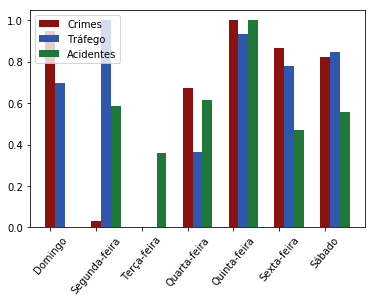

In [12]:
plt.clf()
ax = plt.subplot(111)

gap = 1.5 / len(ncrime)
plt.bar(range(len(ncrime)), ncrime, width=gap, label='Crimes', color='#8c120f')
plt.bar(np.arange(len(ntraffic)) + gap, ntraffic, width=gap, label='Tráfego', color='#2f57ad')
plt.bar(np.arange(len(ncrashes)) + gap * 2, ncrashes, width=gap, label='Acidentes', color='#1f7837')

plt.xticks(range(7), ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'], rotation=50)

ax.legend()

plt.show()
#plt.savefig('days.pdf', bbox_inches="tight", format='pdf')

# Gaussians

In [13]:
import scipy.stats as stats
import math
import numpy as np

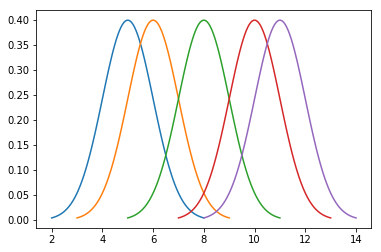

In [14]:
for mu, variance in zip([5, 6, 8, 10, 11], [1, 0.5, 0.2, 1.4, 1]):
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

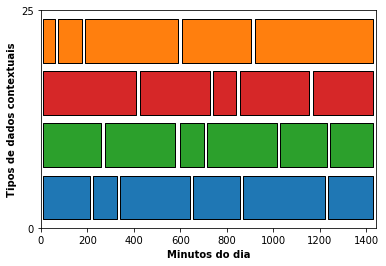

In [15]:
fig, ax = plt.subplots()
ax.broken_barh([(10, 200), (225, 100), (340, 300), (655, 200), (870, 350), (1235, 195)], 
               (1, 5), facecolors='tab:blue', edgecolor='black')

ax.broken_barh([(10, 250), (275, 300), (600, 100), (715, 300), (1030, 200), (1245, 185)], 
               (7, 5), facecolors='tab:green', edgecolor='black')

ax.broken_barh([(10, 400), (425, 300), (740, 100), (855, 300), (1170, 260)], 
               (13, 5), facecolors='tab:red', edgecolor='black')

ax.broken_barh([(10, 50), (75, 100), (190, 400), (605, 300), (920, 510)], 
               (19, 5), facecolors='tab:orange', edgecolor='black')

#ax.broken_barh([(10, 50), (100, 20), (130, 10)], (40, 5), facecolors=('tab:orange', 'tab:green', 'tab:red'))

ax.set_ylim(0, 25)
ax.set_xlim(0, 1440)
ax.set_xlabel('Minutos do dia', fontweight='bold')
ax.set_ylabel('Tipos de dados contextuais', fontweight='bold')
ax.set_yticks([0, 25])

#plt.show()
plt.savefig('windows_color.pdf', bbox_inches="tight", format='pdf')